In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import spanningtree as d
plt.rcParams["figure.figsize"] = (4,4)

# Compute maximum denseness

maximum denseness =  1.5


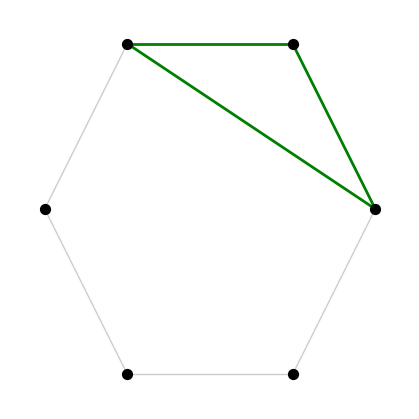

In [2]:
G = nx.cycle_graph(6)
G.add_edge(0,2)
pos = nx.circular_layout(G)
sigma  = np.ones(len(G.edges()))
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
D, subgraph = d.maximum_denseness(G)
print('maximum denseness = ',D)
J = [(u,v) for (u,v) in G.edges() if u in subgraph and v in subgraph]
nx.draw(G,pos,node_size=50,node_color="black",edge_color="#ccc")
nx.draw_networkx_edges(G,pos,edgelist=J, edge_color="green", width=2)

maximum denseness =  5.0


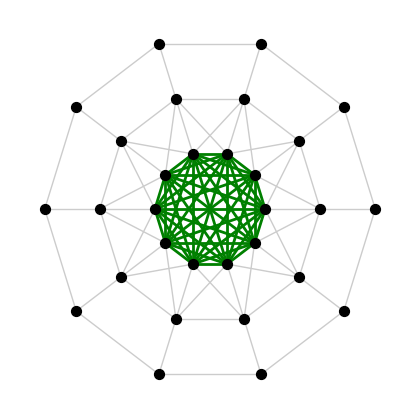

In [3]:
# create the graph
G,pos = d.create_nested_graph(10)
sigma  = np.ones(len(G.edges()))
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
D, subgraph = d.maximum_denseness(G)
print('maximum denseness = ',D)
J = [(u,v) for (u,v) in G.edges() if u in subgraph and v in subgraph]
nx.draw(G,pos,node_size=50,node_color="black",edge_color="#ccc")
nx.draw_networkx_edges(G,pos,edgelist=J, edge_color="green", width=2)

# Compute spanning tree modulus

|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
|  0.6666666666666666  |          3           |          4           | 
|         0.75         |          4           |          1           | 


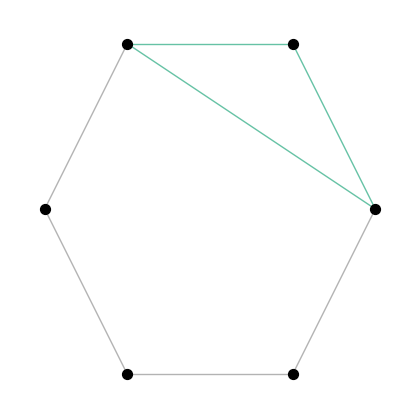

In [4]:
G = nx.cycle_graph(6)
G.add_edge(0,2)
pos = nx.circular_layout(G)
sigma  = np.ones(len(G.edges()))
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)

|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
|         0.2          |          10          |          21          | 
|         0.25         |          11          |          11          | 
|         0.5          |          11          |          1           | 


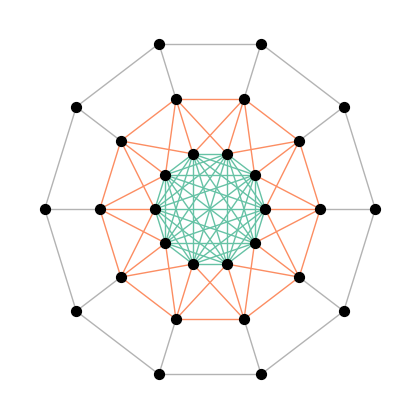

In [5]:
# create the graph
G,pos = d.create_nested_graph(10)
sigma  = np.ones(len(G.edges()))
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)

# Homogeneous graph reinforcement

Old weight = [1. 1. 1. 1. 1. 1. 1.]
|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
|  0.6666666666666666  |          3           |          4           | 
|         0.75         |          4           |          1           | 


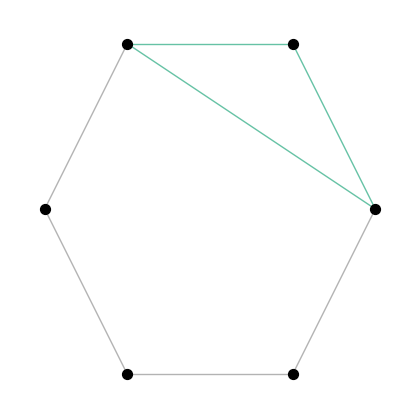

In [6]:
G = nx.cycle_graph(6)
G.add_edge(0,2)
pos = nx.circular_layout(G)
sigma  = np.ones(len(G.edges()))
print('Old weight =', sigma)
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)

new weight =  [1.0000000000000013, 1.4999999999999982, 0.9999999999999987, 1.0, 1.0000000000000013, 1.0, 1.0]
|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
|  0.6666666666666666  |          6           |          1           | 
Increasing amount = [ 0.   0.5 -0.   0.   0.   0.   0. ]
Total cost = 0.49999999999999956


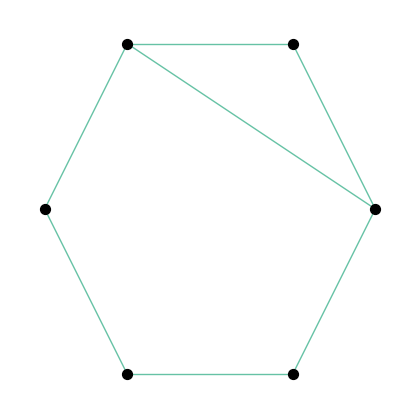

In [7]:
'cost'
c = np.ones(len(G.edges()))
order_index = list(np.argsort(np.array(c)))
new_weight = d.reinforcement(G,order_index)
print('new weight = ',new_weight)
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = new_weight[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)
'cost'
cost = np.dot(np.array(new_weight)-np.array(sigma),np.array(c))
print('Increasing amount =',np.round(np.array(new_weight)-np.array(sigma),4))
print('Total cost =',cost)

Old weight = [1, 5, 10, 15, 20, 30, 45, 60, 80, 100]
|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
| 0.008333333333333333 |          3           |          3           | 
| 0.010526315789473684 |          2           |          2           | 
| 0.03225806451612903  |          2           |          1           | 


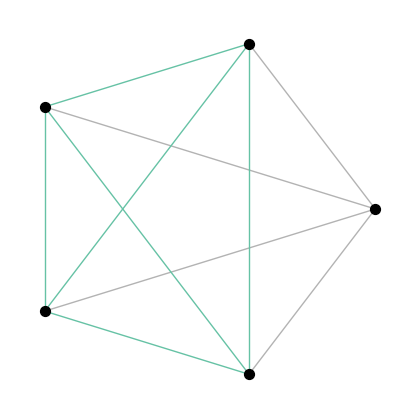

In [8]:
'Graph'
G = nx.complete_graph(5)
'weights'
pos = nx.circular_layout(G)
sigma = [1,5,10,15,20,30,45,60,80,100]
print('Old weight =', sigma)
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)

new weight =  [115.00000000000003, 5.0, 10.0, 15.0, 20.0, 30.0, 45.0, 60.0, 80.0, 100.0]
|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
| 0.008333333333333333 |          5           |          1           | 
Increasing amount = [114.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
Total cost = 114.00000000000003


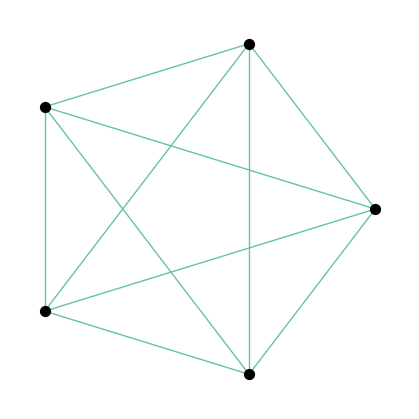

In [9]:
'cost'
c = np.ones(len(G.edges()))
order_index = list(np.argsort(np.array(c)))
new_weight = d.reinforcement(G,order_index)
print('new weight = ',new_weight)
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = new_weight[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)
'cost'
cost = np.dot(np.array(new_weight)-np.array(sigma),np.array(c))
print('Increasing amount =',np.round(np.array(new_weight)-np.array(sigma),4))
print('Total cost =',cost)

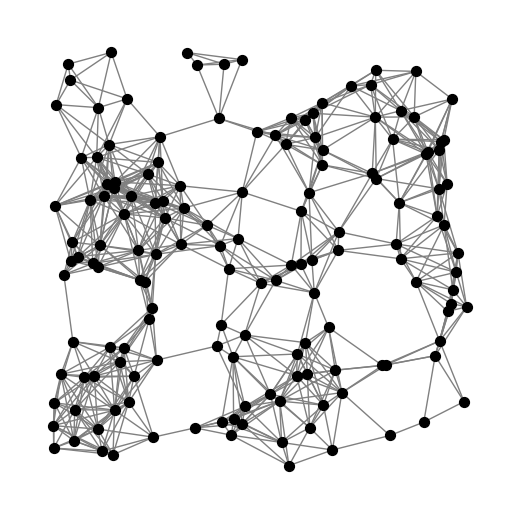

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(150, 0.16, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', edge_color='gray')

|     weight_1eta      |     shrink_node      |     node_remain      |
+----------------------+----------------------+----------------------+
|  0.1414141414141414  |          29          |         122          | 
| 0.14285714285714285  |          3           |         120          | 
| 0.16666666666666666  |          2           |         119          | 
|  0.1746031746031746  |          23          |          97          | 
| 0.19108280254777069  |          31          |          67          | 
|         0.2          |          22          |          46          | 
|         0.2          |          2           |          45          | 
| 0.20491803278688525  |          26          |          20          | 
| 0.21428571428571427  |          4           |          17          | 
|  0.2222222222222222  |          3           |          15          | 
| 0.27272727272727276  |          4           |          12          | 
|         0.3          |          4           |          9        

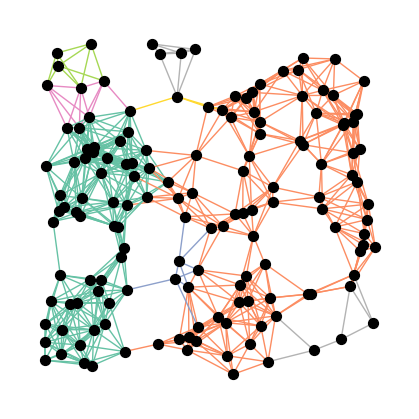

In [10]:
G = nx.random_geometric_graph(150, 0.16, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
sigma  = np.ones(len(G.edges()))
for i,(u,v) in enumerate(G.edges()):
    G[u][v]['weight']  = sigma[i]
# compute eta^*
weight_1eta_star = d.modulus(G)
# plot the graph
nx.draw(G, pos, node_color="black", node_size=50,
edge_color=[weight_1eta_star[G[u][v]['enum']] for (u,v) in G.edges], edge_cmap=plt.cm.Set2)
